# Linear Regression

## Linear Regression Algorithm
Linear regression calculates an intercept and slope (weights) for a line that minimizes the sum of squared errors between the line and the data points. The formula for linear regression is as follows:  
y = z0 + z1x1 + z2x2 + ... + znxn  
y is the target variable, z0 is the intercept, z1 to zn are the weights, and x1 to xn are the features.  

The algorithm is as follows:  
* initialize the weights  
* calculate the predicted values  
* calculate the error  
* update the weights  
* repeat the steps above until convergence  

In [2]:
# load anscombe's quartet
import pandas as pd
x = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]
anscombe = (pd.DataFrame({'x': x, 'y1': y1, 'y2': y2, 'y3': y3, 'x4': x4, 'y4': y4})
            )

anscombe

,x,y1,y2,y3,x4,y4
0,10,8.04,9.14,7.46,8,6.58
1,8,6.95,8.14,6.77,8,5.76
2,13,7.58,8.74,12.74,8,7.71
3,9,8.81,8.77,7.11,8,8.84
4,11,8.33,9.26,7.81,8,8.47
5,14,9.96,8.10,8.84,8,7.04
6,6,7.24,6.13,6.08,8,5.25
7,4,4.26,3.10,5.39,19,12.50
8,12,10.84,9.13,8.15,8,5.56
9,7,4.82,7.26,6.42,8,7.91


<Axes: xlabel='x', ylabel='y1'>

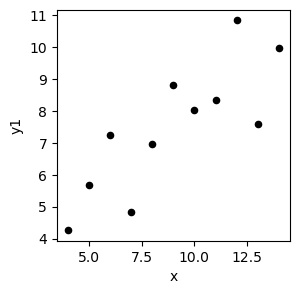

In [3]:
# plot x y1
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(3, 3))
anscombe.plot.scatter(x='x', y='y1', ax=ax, color='k')

In [ ]:
# slope

x1 = anscombe['x']
y1 = anscombe['y1']
slope = ((x1 - x1.mean())*(y1 - y1.mean())).sum() / ((x1 - x1.mean())**2).sum()
slope

np.float64(0.5000909090909091)

In [5]:
# intercept

intercept = y1.mean() - slope * x1.mean()
intercept

np.float64(3.0000909090909103)

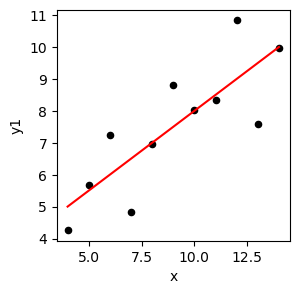

In [7]:
# plot the line
import numpy as np
fig, ax = plt.subplots(figsize=(3, 3))
anscombe.plot.scatter(x='x', y='y1', ax=ax, color='k')
x1 = np.linspace(4, 14, 100)
y1 = slope * x1 + intercept
ax.plot(x1, y1, color='r')

In [8]:
from sklearn.linear_model import LinearRegression

x1 = anscombe[['x']] # this convert a column to a dataframe
y1 = anscombe['y1']
y2 = anscombe['y2']
y3 = anscombe['y3']

lr1 = LinearRegression()
lr1.fit(x1, y1)

LinearRegression()

In [9]:
lr1.coef_

array([0.50009091])

In [10]:
lr1.intercept_

np.float64(3.0000909090909103)

In [11]:
lr2 = LinearRegression()
lr3 = LinearRegression()
lr2.fit(x1,y2)
lr3.fit(x1,y3)

LinearRegression()

(3.0, 13.0)

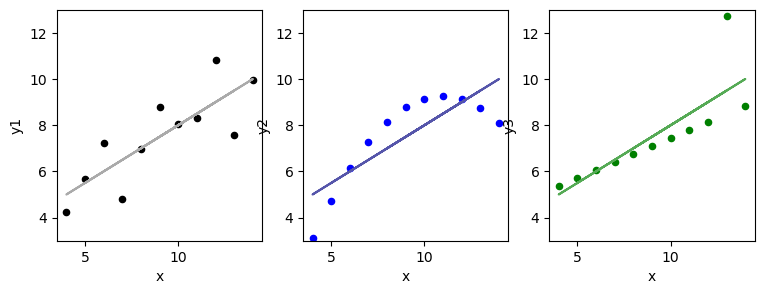

In [12]:
# plot 1, 2, and 3 in different colors
fig, axs = plt.subplots(1, 3, figsize=(9, 3))
anscombe.plot.scatter(x='x', y='y1', ax=axs[0], color='k')
axs[0].plot(x1, lr1.predict(x1), color='#aaa')
axs[0].set_ylim(3, 13)
anscombe.plot.scatter(x='x', y='y2', ax=axs[1], color='b')
axs[1].plot(x1, lr2.predict(x1), color='#55a')
axs[1].set_ylim(3, 13)
anscombe.plot.scatter(x='x', y='y3', ax=axs[2], color='g')
axs[2].plot(x1, lr3.predict(x1), color='#5a5')
axs[2].set_ylim(3, 13)

In [24]:
# https://www.openml.org/search?type=data&sort=runs&id=216&satatus=active
import pandas as pd
from scipy.io import arff

elevators, _ = arff.loadarff("dataset_2202_elevators.arff")
elev = pd.DataFrame(elevators)
elev

,climbRate,Sgz,'p','q',curRoll,absRoll,diffClb,diffRollRate,diffDiffClb,SaTime1,SaTime2,SaTime3,SaTime4,diffSaTime1,diffSaTime2,diffSaTime3,diffSaTime4,Sa,Goal
0,118.0,-55.0,-0.28,-0.08,-0.2,-11.0,11.0,0.005,-0.2,-0.0010,-0.0010,-0.0010,-0.0010,0.0000,0.0,0.0,0.0,-0.0010,0.031
1,390.0,-45.0,-0.06,-0.07,-0.6,-12.0,11.0,0.010,-0.2,-0.0008,-0.0008,-0.0008,-0.0008,0.0000,0.0,0.0,0.0,-0.0008,0.034
2,68.0,6.0,0.11,0.15,0.6,-10.0,-9.0,-0.003,-0.2,-0.0011,-0.0010,-0.0010,-0.0010,-0.0002,0.0,0.0,0.0,-0.0010,0.033
3,-358.0,-12.0,-0.20,0.13,-0.3,-11.0,-7.0,0.001,-0.1,-0.0010,-0.0010,-0.0010,-0.0010,0.0000,0.0,0.0,0.0,-0.0010,0.032
4,-411.0,-19.0,-0.18,0.02,-0.5,-11.0,-3.0,0.002,1.2,-0.0010,-0.0010,-0.0010,-0.0010,0.0000,0.0,0.0,0.0,-0.0010,0.030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16594,299.0,-28.0,0.08,-0.12,-0.3,-9.0,15.0,0.010,-0.2,-0.0005,-0.0005,-0.0005,-0.0005,0.0000,0.0,0.0,0.0,-0.0005,0.027
16595,84.0,0.0,0.14,0.14,1.1,-8.0,-11.0,-0.014,-0.6,-0.0009,-0.0009,-0.0009,-0.0009,0.0000,0.0,0.0,0.0,-0.0009,0.026
16596,-208.0,-6.0,-0.48,0.09,0.2,-9.0,-7.0,-0.010,-0.1,-0.0009,-0.0009,-0.0009,-0.0009,0.0000,0.0,0.0,0.0,-0.0009,0.023
16597,-146.0,-14.0,-0.38,-0.03,-0.8,-10.0,10.0,0.010,-1.0,-0.0005,-0.0005,-0.0005,-0.0005,0.0000,0.0,0.0,0.0,-0.0005,0.022


In [31]:
X = elev.drop(columns=['Goal'])
y = elev['Goal']

# # optionally, standardize the data
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

lr_elev = LinearRegression()
lr_elev.fit(X, y)

lr_elev.coef_

array([ 3.27102410e-06,  5.60974707e-06,  3.74013548e-03,  8.64036126e-04,
        1.05227142e-07,  1.64092446e-03, -6.34044278e-05,  5.36119295e-01,
       -1.13168090e-04, -5.64410313e+00, -5.48664010e+00,  1.87299948e+00,
       -2.35315304e+01,  2.49515181e+00, -7.35963959e+00,  4.87219973e+00,
        1.66386329e+01,  3.24941588e+00])

In [32]:
lr_elev.intercept_

np.float64(0.017687539904601982)

<Axes: >

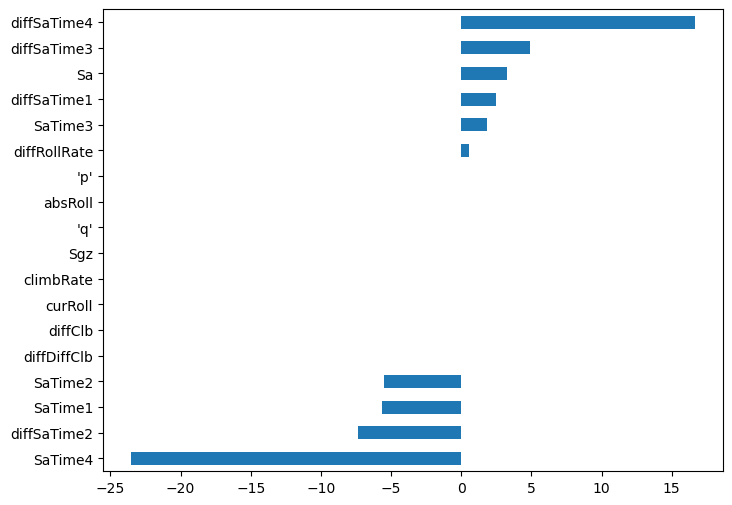

In [33]:
pd.Series(lr_elev.coef_, index=X.columns).sort_values().plot.barh(figsize=(8, 6))

In [34]:
# score is R^2 - the proportion of variance explained by the model
lr_elev.score(X, y)

0.8134759022968554

In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mean_absolute_error(y, lr_elev.predict(X)), mean_squared_error(y, lr_elev.predict(X))

(0.0019881612491878574, 8.41528861850393e-06)

In [ ]:
# use the model to predict with an input value
lr_elev.predict(X.iloc[[0]])

array([0.03014407])

In [ ]:
# check the real value and compare it with the prediction
y.iloc[0]

np.float64(0.031)

## Assumptions of Linear Regression

* linear relationship between the feature and target variable
* no multicollinearity - no correlation between the features
* homoscedasticity - residuals variance is the same for all target variables
* no outliers - the residuals are normally distributed

Also, generally you will want to scale the features before running linear regeression.

In [38]:
# standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

,climbRate,Sgz,'p','q',curRoll,absRoll,diffClb,diffRollRate,diffDiffClb,SaTime1,SaTime2,SaTime3,SaTime4,diffSaTime1,diffSaTime2,diffSaTime3,diffSaTime4,Sa
0,0.467589,-1.658915,-0.869468,-1.160772,-0.259432,-0.051279,1.094770,0.480597,-0.174873,-0.619961,-0.603380,-0.603268,-0.593311,0.107069,-0.010414,0.058624,-0.012937,-0.593078
1,1.447468,-1.265819,-0.160813,-1.074463,-0.679745,-0.295029,1.094770,0.877847,-0.174873,-0.123040,-0.112520,-0.112463,-0.105913,0.107069,-0.010414,0.058624,-0.012937,-0.105799
2,0.287464,0.738974,0.386783,0.824339,0.581193,0.192472,-0.797693,-0.155004,-0.174873,-0.868422,-0.603380,-0.603268,-0.593311,-2.210070,-0.010414,0.058624,-0.012937,-0.593078
3,-1.247200,0.031400,-0.611775,0.651720,-0.364510,-0.051279,-0.608447,0.162796,-0.069542,-0.619961,-0.603380,-0.603268,-0.593311,0.107069,-0.010414,0.058624,-0.012937,-0.593078
4,-1.438132,-0.243768,-0.547352,-0.297681,-0.574667,-0.051279,-0.229954,0.242246,1.299763,-0.619961,-0.603380,-0.603268,-0.593311,0.107069,-0.010414,0.058624,-0.012937,-0.593078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16594,1.119641,-0.597554,0.290149,-1.506009,-0.364510,0.436222,1.473263,0.877847,-0.174873,0.622341,0.623769,0.623744,0.625185,0.107069,-0.010414,0.058624,-0.012937,0.625120
16595,0.345104,0.503116,0.483418,0.738030,1.106585,0.679972,-0.986939,-1.028955,-0.596197,-0.371501,-0.357950,-0.357865,-0.349612,0.107069,-0.010414,0.058624,-0.012937,-0.349438
16596,-0.706825,0.267258,-1.513699,0.306484,0.160881,0.436222,-0.608447,-0.711155,-0.069542,-0.371501,-0.357950,-0.357865,-0.349612,0.107069,-0.010414,0.058624,-0.012937,-0.349438
16597,-0.483470,-0.047219,-1.191583,-0.729227,-0.889902,0.192472,1.000147,0.877847,-1.017522,0.622341,0.623769,0.623744,0.625185,0.107069,-0.010414,0.058624,-0.012937,0.625120


In [39]:
X_scaled.describe()

,climbRate,Sgz,'p','q',curRoll,absRoll,diffClb,diffRollRate,diffDiffClb,SaTime1,SaTime2,SaTime3,SaTime4,diffSaTime1,diffSaTime2,diffSaTime3,diffSaTime4,Sa
count,1.659900e+04,1.659900e+04,1.659900e+04,1.659900e+04,1.659900e+04,1.659900e+04,1.659900e+04,1.659900e+04,1.659900e+04,1.659900e+04,1.659900e+04,1.659900e+04,1.659900e+04,1.659900e+04,1.659900e+04,1.659900e+04,1.659900e+04,1.659900e+04
mean,-1.744359e-17,-3.082058e-17,4.815715e-18,-3.831169e-17,2.889429e-18,-6.164116e-17,8.989335e-18,1.519626e-17,-1.819270e-18,7.084452e-17,-8.561272e-17,4.280636e-17,-2.910832e-17,-3.189074e-17,-3.210477e-19,-2.520893e-17,-3.424509e-18,-9.738446e-17
std,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00
min,-3.534785e+00,-3.388540e+00,-4.380528e+00,-4.354212e+00,-3.201622e+00,-2.976284e+00,-5.244982e+00,-6.590462e+00,-8.706692e+00,-6.831474e+00,-6.739124e+00,-6.738325e+00,-6.442092e+00,-8.002919e+00,-1.041403e-02,-1.027523e+01,-1.293731e-02,-6.440423e+00
25%,-6.780051e-01,-6.368641e-01,-7.084098e-01,-7.292265e-01,-6.797451e-01,-5.387796e-01,-7.030697e-01,-6.317047e-01,-1.748729e-01,-3.715008e-01,-3.579499e-01,-3.578654e-01,-5.933112e-01,1.070695e-01,-1.041403e-02,5.862429e-02,-1.293731e-02,-5.930775e-01
50%,-6.918317e-02,-7.909767e-03,3.245607e-02,-3.875308e-02,5.580243e-02,1.924716e-01,5.391565e-02,3.896161e-03,-6.954175e-02,1.254202e-01,1.329097e-01,1.329392e-01,1.377864e-01,1.070695e-01,-1.041403e-02,5.862429e-02,-1.293731e-02,1.378407e-01
75%,6.801361e-01,6.210446e-01,7.411104e-01,6.517204e-01,6.862717e-01,9.237228e-01,6.216546e-01,6.394970e-01,1.411205e-01,6.223413e-01,6.237693e-01,6.237438e-01,6.251849e-01,1.070695e-01,-1.041403e-02,5.862429e-02,-1.293731e-02,6.251195e-01
max,3.547723e+00,4.198223e+00,3.543516e+00,5.485035e+00,2.997992e+00,1.898724e+00,4.311958e+00,4.532552e+00,8.988933e+00,1.864644e+00,1.850918e+00,1.850755e+00,1.843681e+00,8.217058e+00,1.152312e+02,8.670170e+00,8.588565e+01,1.843317e+00


In [ ]:
lr_std = LinearRegression()
lr_std.fit(X_scaled, y)
lr_std.score(X_scaled, y)

# mean should be close to 0 and std should be close to 1

0.8134759022968555

<Axes: >

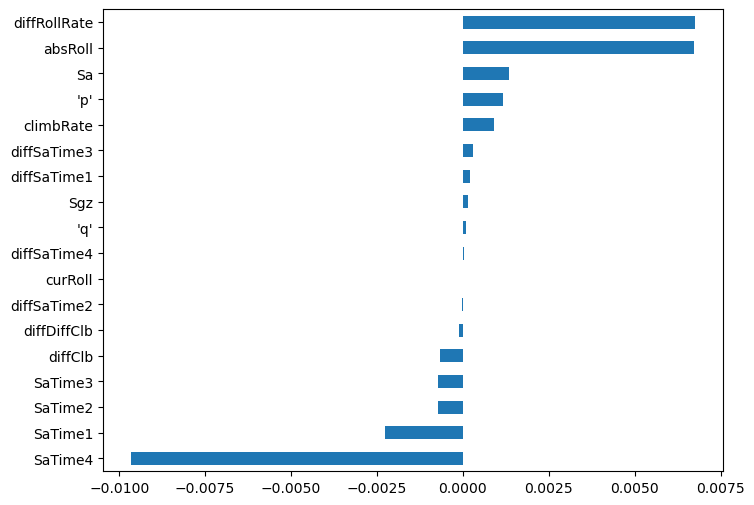

In [41]:
pd.Series(lr_std.coef_, index=X.columns).sort_values().plot.barh(figsize=(8, 6))

In [43]:
!pip install xgboost

  Using cached xgboost-2.1.4-py3-none-win_amd64.whl.metadata (2.1 kB)
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.8/124.9 MB 1.9 MB/s eta 0:01:07
    --------------------------------------- 1.6/124.9 MB 2.4 MB/s eta 0:00:52
    --------------------------------------- 1.6/124.9 MB 2.4 MB/s eta 0:00:52
    --------------------------------------- 2.6/124.9 MB 2.5 MB/s eta 0:00:50
   - -------------------------------------- 3.7/124.9 MB 2.9 MB/s eta 0:00:42
   - -------------------------------------- 4.5/124.9 MB 3.0 MB/s eta 0:00:40
   - -------------------------------

In [ ]:
# try with XGBoost
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X, y)
xgb.score(X, y)

0.9542744875539696

In [51]:
import pandas as pd
raw = pd.read_csv('titanic.csv')
data = raw.loc[:, ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].dropna()
data

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
885,0,3,39.0,0,5,29.1250
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
889,1,1,26.0,0,0,30.0000


In [ ]:
# predict fare from numeric columns
X = data.drop(columns=['Fare'])
y = data['Fare']

lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [53]:
lr.score(X, y)

0.36967952889946787

In [54]:
# make an xgboost model to compare the scores
xgb = XGBRegressor()
xgb.fit(X, y)
xgb.score(X, y)

0.8318405143808066